## EDA del dataset de los viajes de HVFHV durante el mes de septiembre de 2024

### Paso 0: Importar librerias necesarias para el EDA y cargar el dataset que será analizado.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq
import warnings
warnings.simplefilter("ignore")

* Pyarrow para el manejo de la data.
* Matplotlib y seaborn para la visualizacion de los gráficos pertinentes.

In [2]:
raw_hv_tripdata = pq.read_table('../SamuelGitIgnore/fhvhv_tripdata_2024-09.parquet')
raw_hv_tripdata = raw_hv_tripdata.to_pandas()

raw_hv_tripdata.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2024-09-01 00:00:42,2024-09-01 00:04:11,2024-09-01 00:04:54,2024-09-01 00:12:03,263,75,1.64,...,0.75,0.75,0.0,0.00,6.40,Y,N,N,N,N
1,HV0003,B03404,B03404,2024-09-01 00:26:16,2024-09-01 00:27:03,2024-09-01 00:27:49,2024-09-01 00:48:40,263,249,5.66,...,4.04,2.75,0.0,0.00,29.99,N,N,N,N,N
2,HV0003,B03404,B03404,2024-09-01 00:07:08,2024-09-01 00:07:22,2024-09-01 00:08:57,2024-09-01 00:18:34,161,170,1.48,...,1.05,2.75,0.0,0.00,7.62,N,N,N,N,N
3,HV0003,B03404,B03404,2024-09-01 00:19:33,2024-09-01 00:21:14,2024-09-01 00:21:48,2024-09-01 00:46:17,233,220,11.52,...,2.96,2.75,0.0,0.00,29.94,N,N,N,N,N
4,HV0003,B03404,B03404,2024-09-01 00:45:51,2024-09-01 00:49:34,2024-09-01 00:49:34,2024-09-01 01:06:46,220,3,6.29,...,2.53,0.00,0.0,6.38,18.58,N,N,N,N,N


# Paso 1: Exploracion de los datos
* valores erróneos
* valores nulos
* valores duplicados
* valores faltantes

In [3]:
raw_hv_tripdata.shape

(19209788, 24)

El dataset contiene 19209788 filas, que representan los viajes realizados durante el mes de septiembre de 2024, y 24 columnas

In [4]:
raw_hv_tripdata.columns.tolist()

['hvfhs_license_num',
 'dispatching_base_num',
 'originating_base_num',
 'request_datetime',
 'on_scene_datetime',
 'pickup_datetime',
 'dropoff_datetime',
 'PULocationID',
 'DOLocationID',
 'trip_miles',
 'trip_time',
 'base_passenger_fare',
 'tolls',
 'bcf',
 'sales_tax',
 'congestion_surcharge',
 'airport_fee',
 'tips',
 'driver_pay',
 'shared_request_flag',
 'shared_match_flag',
 'access_a_ride_flag',
 'wav_request_flag',
 'wav_match_flag']

En lineas generales la información que contiene el dataset es la siguiente

* *Dispatching_base_num:* Número de licencia de la base de la Comisión de Taxis y Limusinas (TLC) que despachó el viaje. Esto identifica la base o empresa desde la cual se coordinó el viaje (por ejemplo, Uber, Lyft, etc.).
* *pickup_datetime:* Fecha y hora en que el pasajero fue recogido para el viaje.
* *DropOff_datetime:* Fecha y hora en que el pasajero fue dejado en su destino.
* *PULocationID:* Identificador del área de taxi TLC donde comenzó el viaje. Estas zonas están definidas por la TLC en la ciudad.
* *DOLocationID:* Identificador del área de taxi TLC donde terminó el viaje.
* *originating_base_num:* Número de la base que recibió originalmente la solicitud de viaje. Puede ser diferente de la base que despachó el viaje.
* *request_datetime:* Fecha y hora en que el pasajero solicitó ser recogido.
* *on_scene_datetime:* Fecha y hora en que el conductor llegó al lugar de recogida. Este dato aplica solo para vehículos accesibles (por ejemplo, para personas con movilidad reducida).
* *trip_miles:* Distancia total del viaje en millas.
* *trip_time:* Duración total del viaje en segundos.
* *base_passenger_fare:* Tarifa base pagada por el pasajero antes de incluir peajes, propinas, impuestos y otros cargos.
* *tolls:* Monto total de los peajes pagados durante el viaje.
* *bcf (Black Car Fund):* Monto recaudado en el viaje para el Black Car Fund, un fondo de beneficios para conductores en Nueva York.
* *sales_tax:* Monto recaudado en concepto de impuesto sobre las ventas del estado de Nueva York (NYS).
* *congestion_surcharge:* Monto recaudado por el recargo de congestión del estado de Nueva York.
* *airport_fee:* Tarifa fija de $2.50 para viajes que incluyen recogida o entrega en los aeropuertos LaGuardia, Newark o John F. Kennedy.
* *tips:* Total de propinas recibidas del pasajero.
* *driver_pay:* Pago neto recibido por el conductor (excluyendo peajes y propinas), después de comisiones, recargos e impuestos.
* *shared_request_flag:* Indica si el pasajero aceptó compartir un viaje o una tarifa combinada con otros pasajeros.  
  * **Y:** Sí, aceptó compartir el viaje.  
  * **N:** No, no aceptó compartir el viaje.
* *shared_match_flag:* Indica si el pasajero efectivamente compartió el vehículo con otra persona que reservó el viaje por separado.  
  * **Y:** Sí, compartió el vehículo.  
  * **N:** No, no compartió el vehículo.
* *access_a_ride_flag:* Indica si el viaje fue administrado en nombre de la Autoridad de Transporte Metropolitano (MTA).  
  * **Y:** Sí, el viaje fue administrado por la MTA.  
  * **N:** No, no fue administrado por la MTA.
* *wav_request_flag:* Indica si el pasajero solicitó un vehículo accesible para sillas de ruedas (WAV).  
  * **Y:** Sí, solicitó un WAV.  
  * **N:** No, no solicitó un WAV.
* *wav_match_flag:* Indica si el viaje se realizó en un vehículo accesible para sillas de ruedas (WAV).  
  * **Y:** Sí, el viaje fue en un WAV.  
  * **N:** No, el viaje no fue en un WAV.


In [5]:
# Se ordena la data de acuerdo a la hora y fecha que comienza el viaje
raw_hv_tripdata.sort_values(by=['pickup_datetime'])

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
20056,HV0003,B03404,B03404,2024-08-31 23:56:32,2024-08-31 23:59:13,2024-09-01 00:00:00,2024-09-01 00:17:01,114,66,3.050,...,2.17,2.75,0.0,0.00,14.07,N,N,N,N,N
28937,HV0003,B03404,B03404,2024-08-31 23:59:12,2024-08-31 23:59:40,2024-09-01 00:00:00,2024-09-01 00:39:54,170,37,8.350,...,3.26,2.75,0.0,0.00,34.62,N,N,N,N,N
13421,HV0005,B03406,None,2024-09-01 00:00:01,NaT,2024-09-01 00:00:00,2024-09-01 00:16:36,101,218,10.410,...,3.18,0.00,0.0,0.00,23.92,N,N,N,N,N
22462,HV0003,B03404,B03404,2024-08-31 23:58:58,2024-08-31 23:59:43,2024-09-01 00:00:00,2024-09-01 00:14:22,261,170,4.610,...,1.92,2.75,0.0,0.00,14.65,N,N,N,N,N
27318,HV0003,B03404,B03404,2024-08-31 23:56:13,2024-09-01 00:00:00,2024-09-01 00:00:00,2024-09-01 00:07:05,225,37,1.050,...,0.79,0.00,0.0,0.00,5.56,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19197899,HV0003,B03404,B03404,2024-09-30 23:58:23,2024-09-30 23:58:56,2024-09-30 23:59:59,2024-10-01 00:04:53,164,170,0.750,...,1.59,2.75,0.0,0.00,10.62,N,N,N,N,N
19197363,HV0003,B03404,B03404,2024-09-30 23:57:13,2024-09-30 23:59:29,2024-09-30 23:59:59,2024-10-01 00:12:24,197,216,2.520,...,1.11,0.00,0.0,3.00,10.67,N,N,N,N,N
19202126,HV0005,B03406,None,2024-09-30 23:58:16,NaT,2024-09-30 23:59:59,2024-10-01 00:23:38,163,116,6.227,...,2.28,2.75,0.0,0.00,25.41,N,N,N,N,N
19192658,HV0005,B03406,None,2024-09-30 23:57:17,NaT,2024-09-30 23:59:59,2024-10-01 00:07:06,50,143,0.861,...,0.66,2.75,0.0,0.00,5.67,N,N,N,N,Y


In [6]:
# Se verifica si hay valores de fecha que no correspondan a septiembre de 2024
raw_hv_tripdata[(raw_hv_tripdata['pickup_datetime'].dt.year != 2024) | (raw_hv_tripdata['pickup_datetime'].dt.month != 9)]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag


No se encontraron valores de fecha fuera de septiembre de 2024, que es el rango tiempo en el que se tomaron los datos

In [7]:
# Se observan valores nulos
raw_hv_tripdata.isnull().sum()

hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4571894
request_datetime              0
on_scene_datetime       4571854
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64

Se observa que las columnas **originating_base_num** y **on_scene_datetime** tienen un 2,4% de valores nulos

Estos faltantes pueden deberse a errores de registro

In [8]:
# Se observan valores duplicados 
raw_hv_tripdata.duplicated().sum()

0

No se encontraron valores duplicados en este dataset

Se procede a evaluar algunos valores por columna.

Para ciertas columnas, un valor cero o negativo no tiene sentido...

In [9]:
print(f'Viajes con distancia 0: {raw_hv_tripdata[raw_hv_tripdata['trip_miles'] == 0].shape[0]}')
print(f'Viajes con distancia "negativa": {raw_hv_tripdata[raw_hv_tripdata['trip_miles'] < 0].shape[0]}')

Viajes con distancia 0: 2991
Viajes con distancia "negativa": 0


No hay valores de distancia negativos registrados

Hay 2991 (0.02%) de valores de distancia iguales a cero. <br>Esto puede deberse a un error al activar el contador de millas del taxi

In [10]:
# Se buscan si se registraron inicios o finales de viaje fuera de las locaciones existentes
print(raw_hv_tripdata[raw_hv_tripdata['PULocationID'] <= 0].shape)
print(raw_hv_tripdata[raw_hv_tripdata['DOLocationID'] <= 0].shape)

print(raw_hv_tripdata[raw_hv_tripdata['PULocationID'] >= 266].shape)
print(raw_hv_tripdata[raw_hv_tripdata['DOLocationID'] >= 266].shape)

(0, 24)
(0, 24)
(0, 24)
(0, 24)


In [11]:
print(f'Viajes con tarifa 0: {raw_hv_tripdata[raw_hv_tripdata['base_passenger_fare'] == 0].shape[0]}')
print(f'Viajes con tarifa "negativa": {raw_hv_tripdata[raw_hv_tripdata['base_passenger_fare'] < 0].shape[0]}')

Viajes con tarifa 0: 1188
Viajes con tarifa "negativa": 477


In [12]:
df_filtered = raw_hv_tripdata.dropna(subset=["request_datetime", "on_scene_datetime"])
df_filtered["wait_time_minutes"] = (df_filtered["on_scene_datetime"] - df_filtered["request_datetime"]).dt.total_seconds() / 60

average_wait_time = df_filtered["wait_time_minutes"].mean()

print(f"El tiempo de espera promedio es de {average_wait_time:.2f} minutos.")


El tiempo de espera promedio es de 3.47 minutos.


# Paso 2: Análisis preparatorio para el proceso ETL

A continuación pasaremos a mostrar el tipo de datos de este dataset, separar las columnas por la importancia para los objetivos del proyecto y sugerencias para cambios

In [13]:
raw_hv_tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19209788 entries, 0 to 19209787
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[us]
 4   on_scene_datetime     datetime64[us]
 5   pickup_datetime       datetime64[us]
 6   dropoff_datetime      datetime64[us]
 7   PULocationID          int32         
 8   DOLocationID          int32         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

### De la información anterior, las principales columnas necesarias de acuerdo a los objetivos y producto ML son:

| Columna |  Tipo de dato  
| ------             |    -----    
| request_datetime  | datetime64[us] 
|  on_scene_datetime  | datetime64[us] 
|  pickup_datetime | datetime64[us] 
|  dropoff_datetime |datetime64[us]
|  trip_miles | float64 
| trip_time     |        int64       
|  PULocationID   |  int32 
|  DOLocationID | int32 



### Columnas opcionales que se pueden conservar para algun tipo de extra o plus.

| Columna          |      tipo de dato      
| ------             |    -----           
| congestion_surcharge|  float64       
| Airport_fee           | float64
| base_passenger_fare |  float64       
| tolls |   float64       
| bcf |  float64       
| sales_tax| float64                  
| tips| float64       
| driver_pay| float64

### Columnas que, por el momento, no aportan información relevante relacionada con el proyecto


| Columna          |     Tipo de dato      
| ------             |    -----  
| hvfhs_license_num  |    object        
| dispatching_base_num  | object        
|  originating_base_num  | object        
| shared_request_flag   | object        
| shared_match_flag     | object        
| access_a_ride_flag    | object        
| wav_request_flag      | object        
| wav_match_flag        | object 

In [14]:
hv_filtrado = raw_hv_tripdata[['request_datetime',
                                   'on_scene_datetime',
                                 'pickup_datetime', 
                                                 'dropoff_datetime',
                                                 'trip_miles',
                                                 'trip_time',
                                                 'PULocationID',
                                                 'DOLocationID']]

hv_filtrado.shape

(19209788, 8)

## Para el filtrado de datos, se sugiere seguir los siguientes criterios:

* Eliminar las filas donde `pickup_datetime` y `PULocationID` sean nulos.

In [15]:
hv_filtrado = hv_filtrado[(hv_filtrado['pickup_datetime'].notnull())&(hv_filtrado['PULocationID'].notnull())].copy().reset_index(drop=True)

hv_filtrado.shape

(19209788, 8)

* Eliminar tiempos y distancias 0 y negativas.

In [16]:
hv_filtrado =hv_filtrado[(hv_filtrado['trip_time']>0)&(hv_filtrado['trip_miles']>0)].reset_index(drop=True)

hv_filtrado.shape

(19206797, 8)

* Con tiempos y distancias positivas crear una nueva columna calculando velocidad promedio.
* Mantener filas cuyas velocidades sean razonables (Valor a establecer, en este EDA se usara 65 mph que es la maxima velocidad permitida en NYC).

In [ ]:
hv_filtrado['trip_time'].head()

0     429
1    1251
2     577
3    1469
4    1032
Name: trip_time, dtype: int64

El tiempo esta en segundos, por lo que hay que considerarlo en el calculo de la velocidad.

In [18]:
hv_filtrado['avg_speed'] =hv_filtrado['trip_miles']/(hv_filtrado['trip_time']/3600)
hv_filtrado['avg_speed'].dtype

dtype('float64')

In [19]:
hv_filtrado =hv_filtrado[(hv_filtrado['avg_speed']>=0)&(hv_filtrado['avg_speed']<=65)].reset_index(drop=True)

hv_filtrado.shape

(19206721, 9)

# Paso 3: Gráficos, Distribuciones y Correlaciones

A continuación pasaremos a mostrar graficamente algunas distribuciones y correlaciones presentes en los datos

Para el producto ML que se presentará, los valores mas relevantes son la fecha, hora, y ubicacion, por lo que mostraremos los graficos de distribución considerando esos valores

In [20]:
hv_filtrado['weekday']=hv_filtrado['pickup_datetime'].dt.day_name()
hv_filtrado.head()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_time,PULocationID,DOLocationID,avg_speed,weekday
0,2024-09-01 00:00:42,2024-09-01 00:04:11,2024-09-01 00:04:54,2024-09-01 00:12:03,1.64,429,263,75,13.762238,Sunday
1,2024-09-01 00:26:16,2024-09-01 00:27:03,2024-09-01 00:27:49,2024-09-01 00:48:40,5.66,1251,263,249,16.287770,Sunday
2,2024-09-01 00:07:08,2024-09-01 00:07:22,2024-09-01 00:08:57,2024-09-01 00:18:34,1.48,577,161,170,9.233969,Sunday
3,2024-09-01 00:19:33,2024-09-01 00:21:14,2024-09-01 00:21:48,2024-09-01 00:46:17,11.52,1469,233,220,28.231450,Sunday
4,2024-09-01 00:45:51,2024-09-01 00:49:34,2024-09-01 00:49:34,2024-09-01 01:06:46,6.29,1032,220,3,21.941860,Sunday


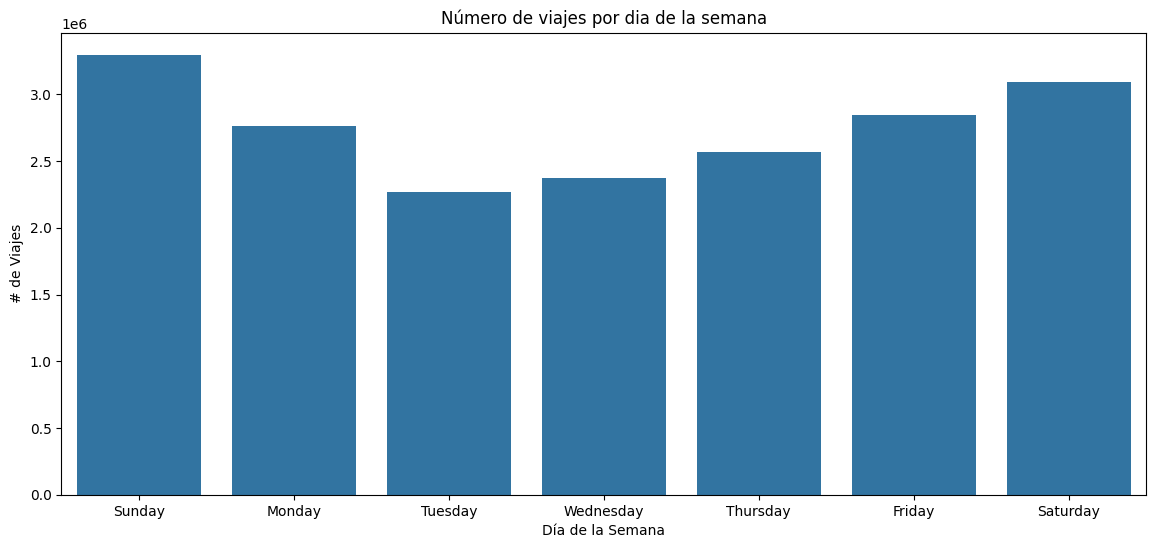

In [21]:
plt.rcParams["figure.figsize"] = (14,6)
sns.countplot(data=hv_filtrado,x='weekday',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('Número de viajes por dia de la semana') 
plt.xlabel('Día de la Semana')
plt.ylabel('# de Viajes')
plt.show()

### Se observa que, en general, la cantidad de viajes durante la semana es homogénea, con un minimo los dias martes y máximo los días domingo

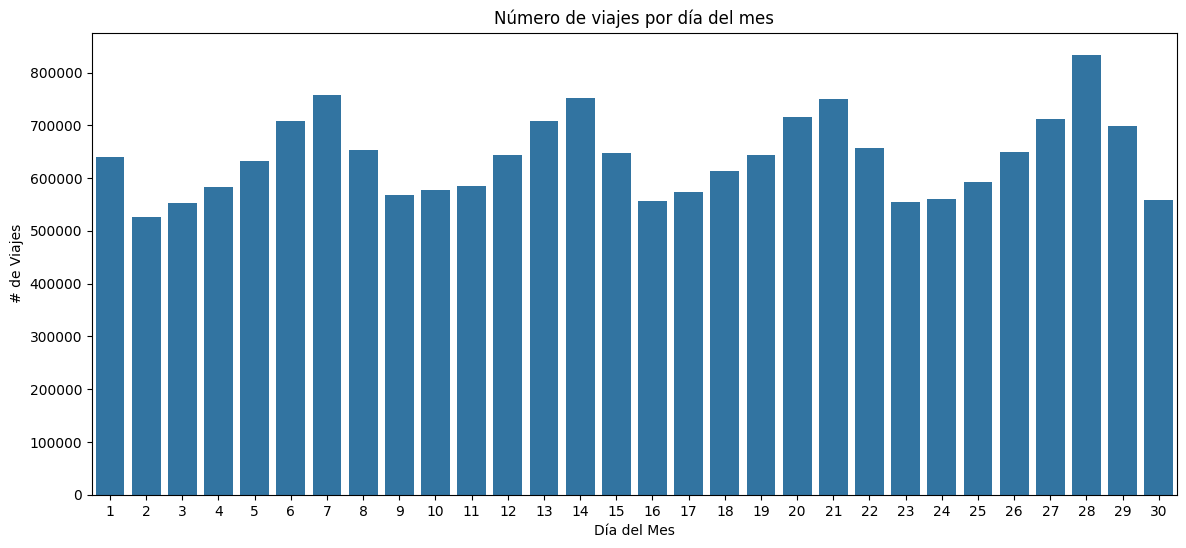

In [22]:
sns.countplot(data=hv_filtrado,x=hv_filtrado['pickup_datetime'].dt.day)
plt.title('Número de viajes por día del mes') 
plt.xlabel('Día del Mes')
plt.ylabel('# de Viajes')
plt.show()

### Se observa una tendencia oscilante que va acorde con el comportamiento de la cantidad de viajes observado durante los dias de la semana

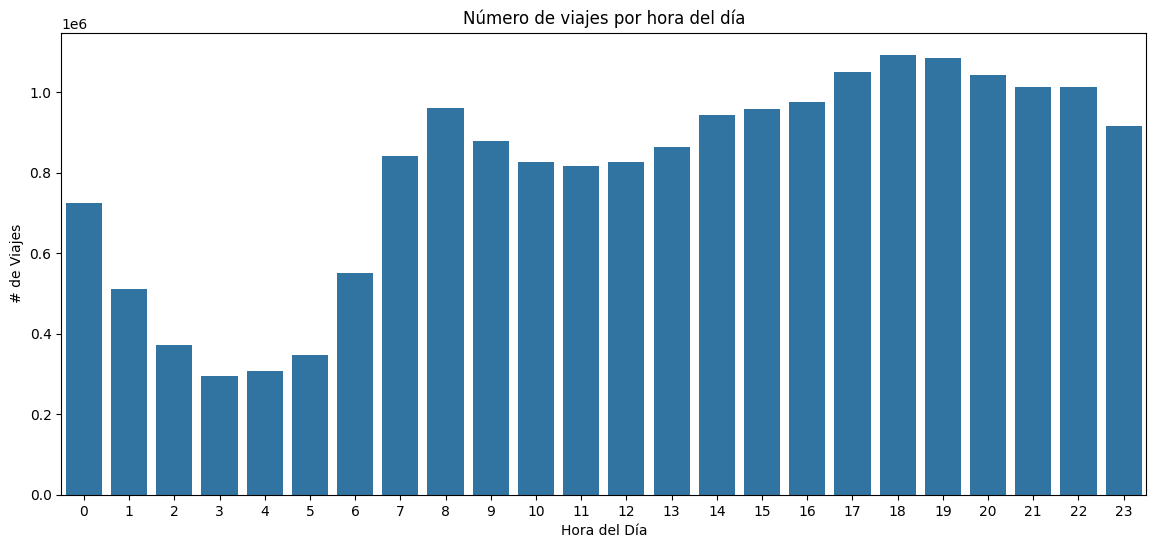

In [23]:
sns.countplot(data=hv_filtrado,x=hv_filtrado['pickup_datetime'].dt.hour)
plt.title('Número de viajes por hora del día') 
plt.xlabel('Hora del Día')
plt.ylabel('# de Viajes')
plt.show()

### Al examinar el numero de viajes durante el día, comenzamos en un minimo de viajes a partir de las 3-4am que comienza a crecer hasta llegar a un primer pico a las 8am, un pequeño descenso alrededor del mediodia, dode luego vuelve a alzar hasta su maximo pico a las 6pm, donde luego comienza a descender nuevamente.

In [24]:
hv_time_transformed = hv_filtrado.copy()

hv_time_transformed['PU_dia']=hv_time_transformed['pickup_datetime'].dt.day
hv_time_transformed['PU_mes']=hv_time_transformed['pickup_datetime'].dt.month
hv_time_transformed['PU_hora']=hv_time_transformed['pickup_datetime'].dt.hour
hv_time_transformed['PU_dia_semana']=hv_time_transformed['pickup_datetime'].dt.weekday
hv_time_transformed['PU_año']=hv_time_transformed['pickup_datetime'].dt.year

hv_time_transformed.head(3)

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_time,PULocationID,DOLocationID,avg_speed,weekday,PU_dia,PU_mes,PU_hora,PU_dia_semana,PU_año
0,2024-09-01 00:00:42,2024-09-01 00:04:11,2024-09-01 00:04:54,2024-09-01 00:12:03,1.64,429,263,75,13.762238,Sunday,1,9,0,6,2024
1,2024-09-01 00:26:16,2024-09-01 00:27:03,2024-09-01 00:27:49,2024-09-01 00:48:40,5.66,1251,263,249,16.287770,Sunday,1,9,0,6,2024
2,2024-09-01 00:07:08,2024-09-01 00:07:22,2024-09-01 00:08:57,2024-09-01 00:18:34,1.48,577,161,170,9.233969,Sunday,1,9,0,6,2024


In [25]:
trip_counts= hv_time_transformed.groupby(['PU_año', 'PU_mes','PU_dia','PU_hora','PU_dia_semana','weekday'])\
                                .agg(Count=('PU_hora','count'))\
                                .reset_index()

trip_counts

,PU_año,PU_mes,PU_dia,PU_hora,PU_dia_semana,weekday,Count
0,2024,9,1,0,6,Sunday,36929
1,2024,9,1,1,6,Sunday,29194
2,2024,9,1,2,6,Sunday,23023
3,2024,9,1,3,6,Sunday,17924
4,2024,9,1,4,6,Sunday,14883
...,...,...,...,...,...,...,...
715,2024,9,30,19,0,Monday,31243
716,2024,9,30,20,0,Monday,28199
717,2024,9,30,21,0,Monday,27580
718,2024,9,30,22,0,Monday,26403


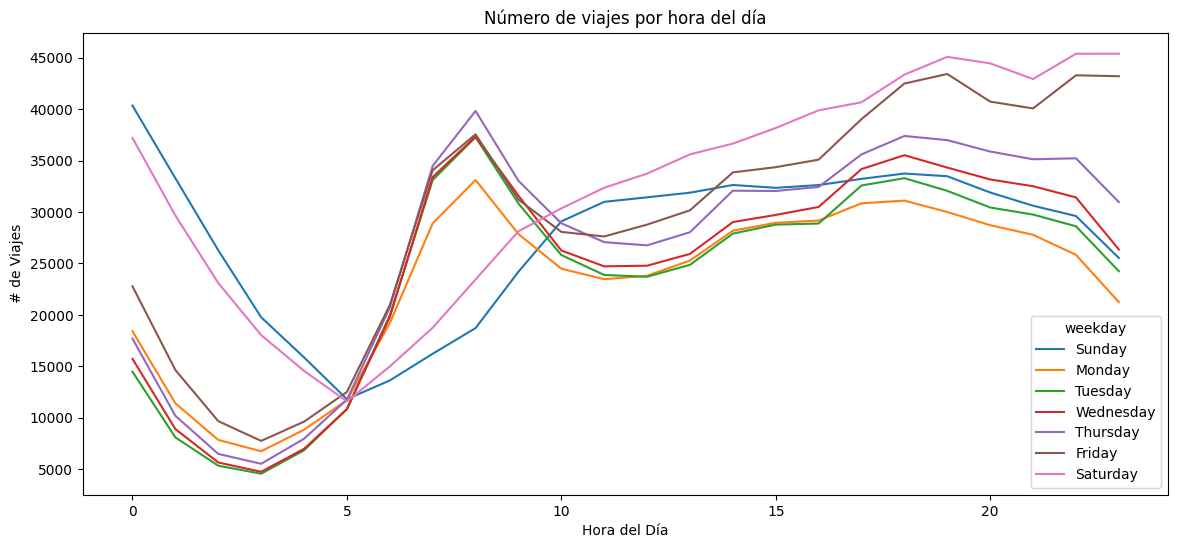

In [26]:
sns.lineplot(data=trip_counts,x=trip_counts['PU_hora'],y=trip_counts['Count'],hue=trip_counts['weekday'],errorbar=None)
plt.title('Número de viajes por hora del día') 
plt.xlabel('Hora del Día')
plt.ylabel('# de Viajes')
plt.show()

### **Al examinar el numero de viajes durante el día, pero separando segun el dia de la semana, podemos observar que hay una diferencia clara, en especial desde la medianoche hasta las 8am aprox., entre los dias de semana (Lun-Vie) y los fines de semana (Sab-Dom).**

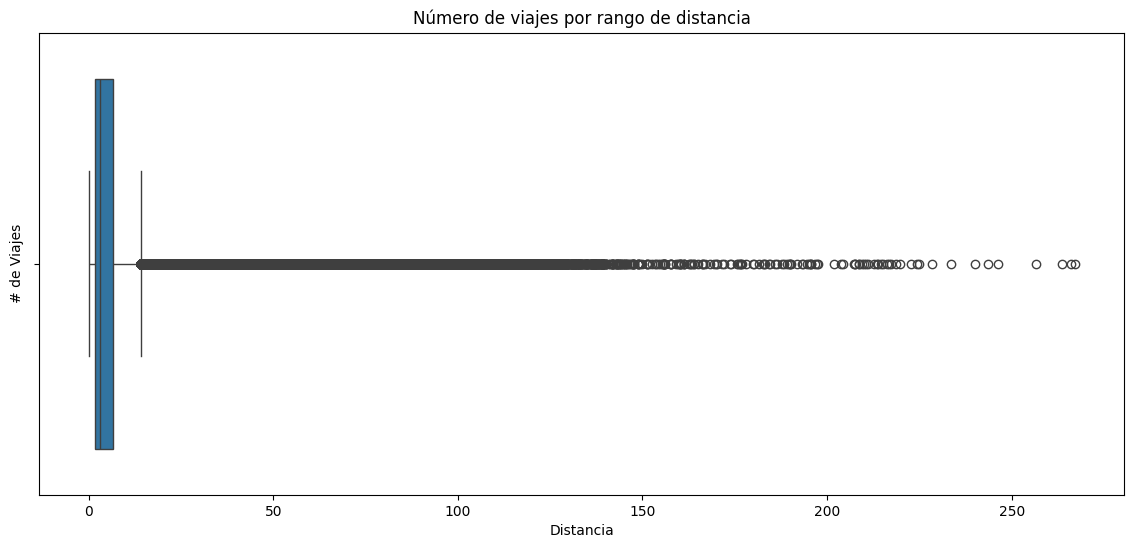

In [27]:
sns.boxplot(x=hv_filtrado['trip_miles'])
plt.title('Número de viajes por rango de distancia') 
plt.xlabel('Distancia')
plt.ylabel('# de Viajes')
plt.show()

### Para las distancias recorridas, claramente se ve que hay valores que distorsionan fuertemente el diagrama
### Se realizara un filtro donde se conservara solamente aquellos valores razonables

In [28]:
hv_filtrado['trip_miles'].describe()

count    1.920672e+07
mean     5.205589e+00
std      5.967712e+00
min      1.000000e-03
25%      1.610000e+00
50%      3.109000e+00
75%      6.592000e+00
max      2.671400e+02
Name: trip_miles, dtype: float64

### Debido a la influencia de los outliers, nos quedaremos con el percentil 90

In [29]:
quantile_90 = hv_filtrado[hv_filtrado['trip_miles'] <= hv_filtrado['trip_miles'].quantile(0.90)]['trip_miles'].reset_index(drop=True)
quantile_90.describe()

count    1.728792e+07
mean     3.679182e+00
std      2.806870e+00
min      1.000000e-03
25%      1.500000e+00
50%      2.717000e+00
75%      5.140000e+00
max      1.193000e+01
Name: trip_miles, dtype: float64

### Ahora nuestro maximo pasó de 267 millas a 11.9. Graficaremos para observar la distribucion de caja.

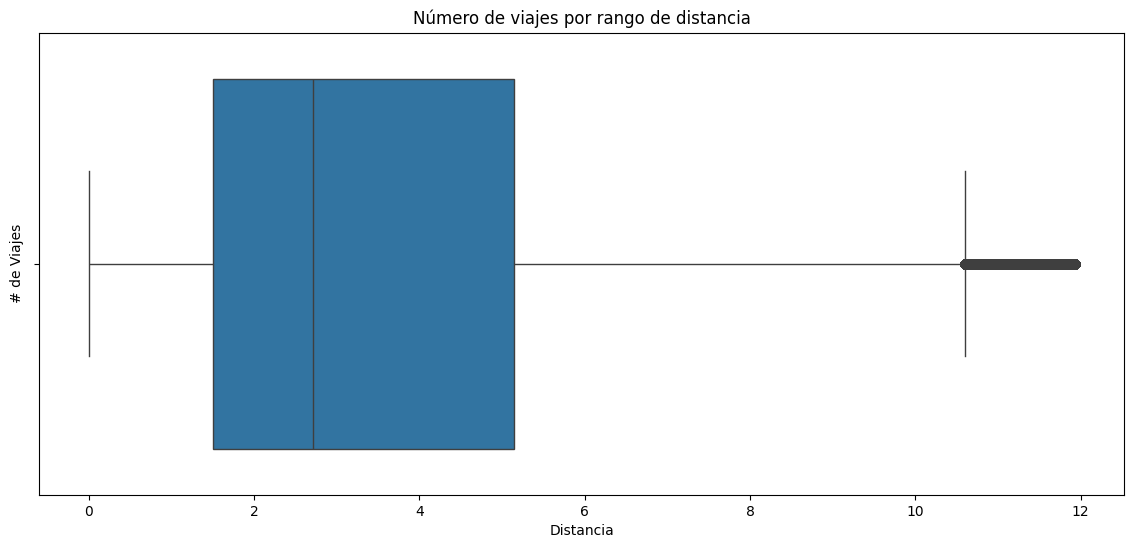

In [30]:
sns.boxplot(x=quantile_90)
plt.title('Número de viajes por rango de distancia') 
plt.xlabel('Distancia')
plt.ylabel('# de Viajes')
plt.show()

### Aquí se observa una distribución mas razonable. Con este nuevo rango se pueden visualizar los histogramas:

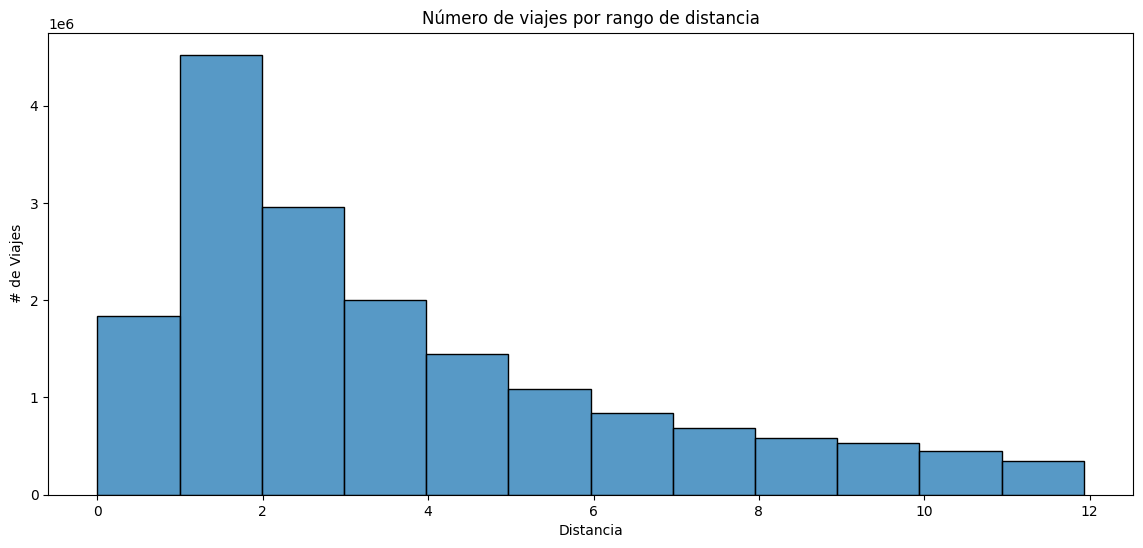

In [31]:
sns.histplot(data=quantile_90, binwidth=1)
plt.title('Número de viajes por rango de distancia') 
plt.xlabel('Distancia')
plt.ylabel('# de Viajes')
plt.show()

### Se observa que la gran mayoria se encuentra en las primeras 5 millas.

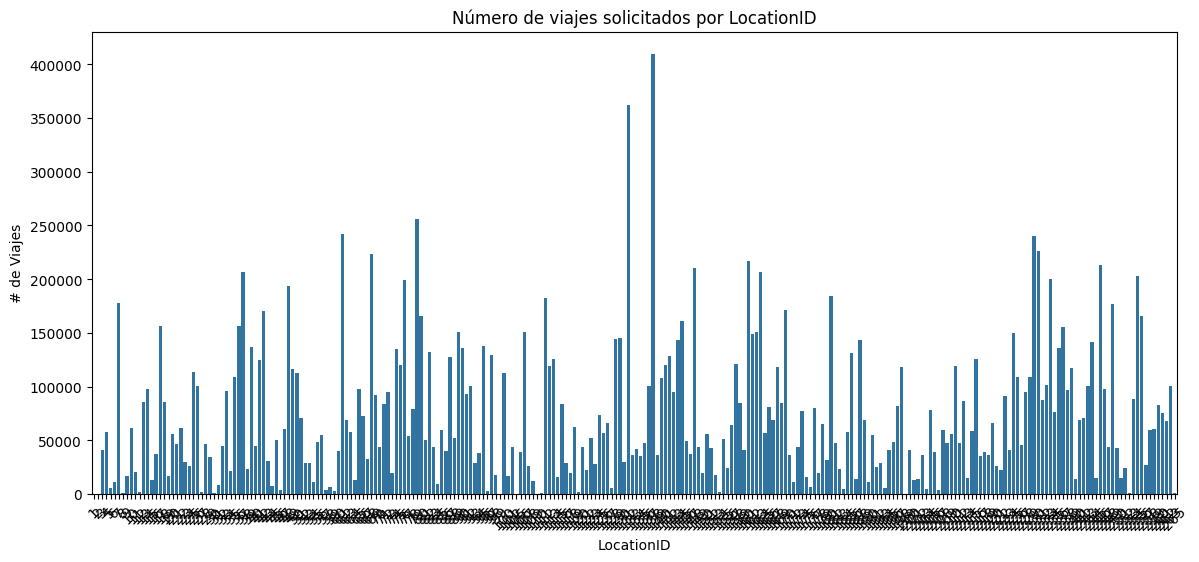

In [32]:
sns.countplot(data=hv_filtrado,x='PULocationID')
plt.title('Número de viajes solicitados por LocationID') 
plt.xlabel('LocationID')
plt.ylabel('# de Viajes')
plt.xticks(rotation=45)
plt.show()

### Acá se puede observar la cantidad de viajes solicitados por zona de NY. Al tener tantas zonas el grafico esta muy saturado, pero se puede observar claramente ciertas zonas donde claramente hay mayor demanda. A continuación se filtrará la data para obtener solo aquellos con un numero alto de solicitudes.

In [33]:
conteo_100000 = hv_filtrado.groupby('PULocationID').filter(lambda x: len(x) >= 100000).copy().reset_index()
# yellow_tripdata_sample[yellow_tripdata_sample['PULocationID'].isin(yellow_tripdata_sample['PULocationID'].value_counts()[yellow_tripdata_sample['PULocationID'].value_counts()>25000].index)]
# Forma secundaria

conteo_100000

,index,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_time,PULocationID,DOLocationID,avg_speed,weekday
0,0,2024-09-01 00:00:42,2024-09-01 00:04:11,2024-09-01 00:04:54,2024-09-01 00:12:03,1.640,429,263,75,13.762238,Sunday
1,1,2024-09-01 00:26:16,2024-09-01 00:27:03,2024-09-01 00:27:49,2024-09-01 00:48:40,5.660,1251,263,249,16.287770,Sunday
2,2,2024-09-01 00:07:08,2024-09-01 00:07:22,2024-09-01 00:08:57,2024-09-01 00:18:34,1.480,577,161,170,9.233969,Sunday
3,3,2024-09-01 00:19:33,2024-09-01 00:21:14,2024-09-01 00:21:48,2024-09-01 00:46:17,11.520,1469,233,220,28.231450,Sunday
4,5,2024-09-01 00:03:03,2024-09-01 00:03:50,2024-09-01 00:05:51,2024-09-01 00:12:28,0.870,397,231,125,7.889169,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
11459701,19206716,2024-09-30 23:10:43,NaT,2024-09-30 23:13:06,2024-09-30 23:28:28,3.279,922,255,49,12.803037,Monday
11459702,19206717,2024-09-30 23:37:07,NaT,2024-09-30 23:38:50,2024-09-30 23:52:07,2.994,797,49,80,13.523714,Monday
11459703,19206718,2024-09-30 23:54:12,NaT,2024-09-30 23:58:07,2024-10-01 00:20:22,5.188,1335,80,141,13.990112,Monday
11459704,19206719,2024-09-30 23:22:22,2024-09-30 23:24:40,2024-09-30 23:26:34,2024-09-30 23:32:16,1.150,342,41,42,12.105263,Monday


In [34]:
hv_filtrado['PULocationID'].nunique()

262

In [35]:
hv_filtrado['PULocationID'].value_counts()[hv_filtrado['PULocationID'].value_counts()>=25000].shape[0]

198

### De lo anterior se observa que de los 262 diferentes LocationID, en 198 de ellos es donde se concentra la mayoría de las solicitudes

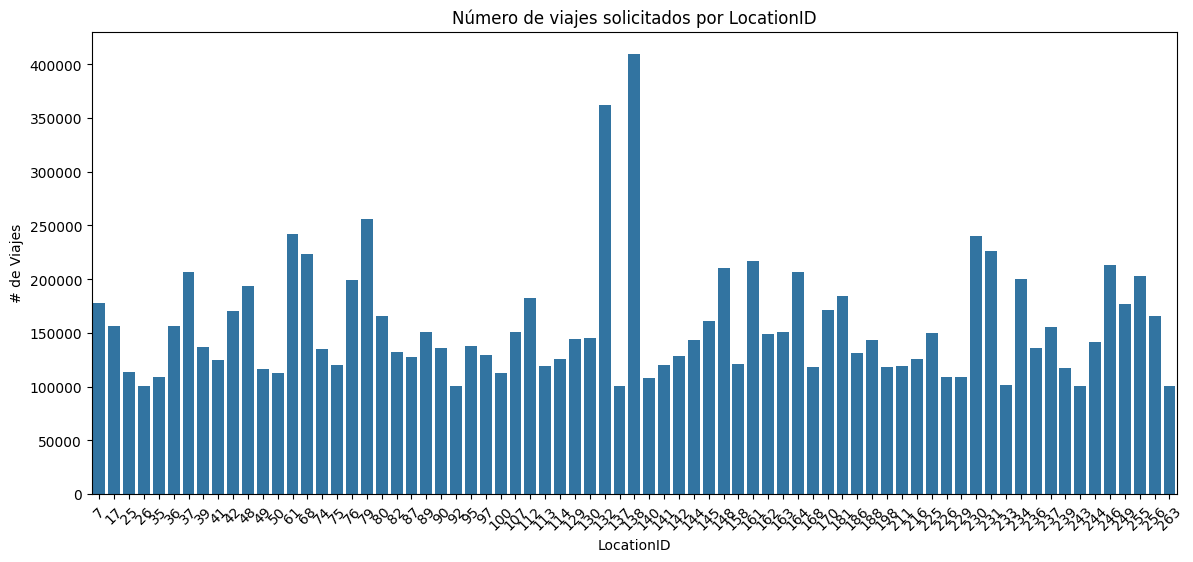

In [36]:
sns.countplot(data=conteo_100000,x='PULocationID')
plt.title('Número de viajes solicitados por LocationID') 
plt.xlabel('LocationID')
plt.ylabel('# de Viajes')
plt.xticks(rotation=45)
plt.show()

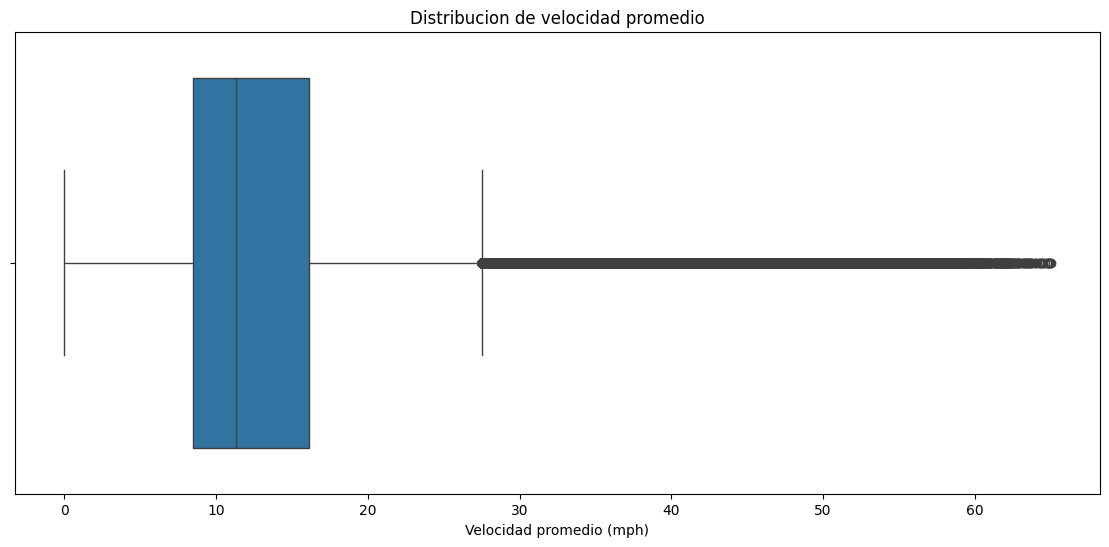

In [37]:
sns.boxplot(x=hv_filtrado['avg_speed'])
plt.title('Distribucion de velocidad promedio') 
plt.xlabel('Velocidad promedio (mph)')
plt.show()

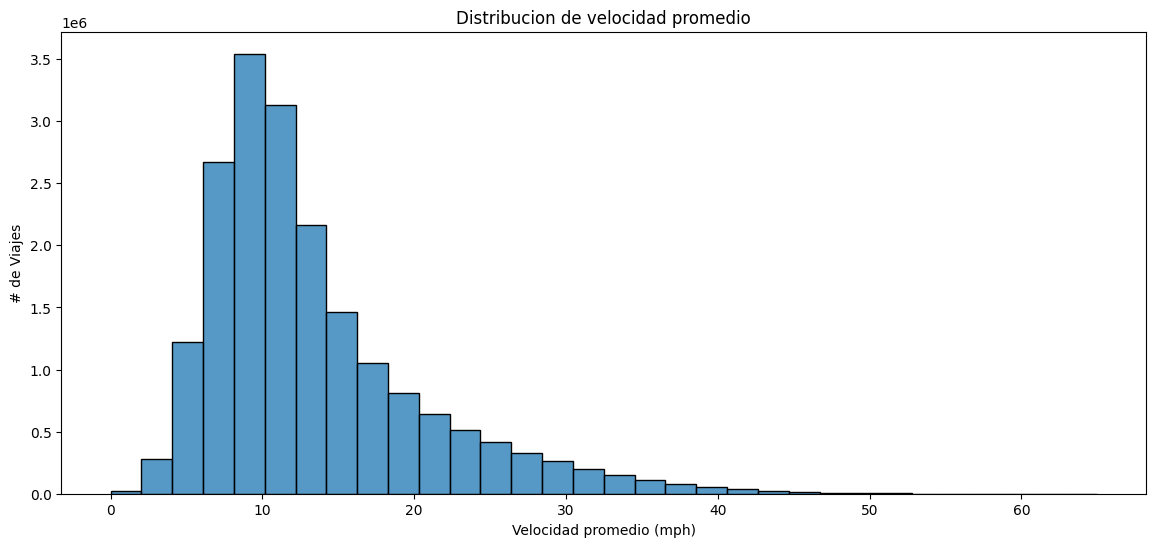

In [38]:
sns.histplot(data=hv_filtrado['avg_speed'], binwidth=2)
plt.title('Distribucion de velocidad promedio') 
plt.xlabel('Velocidad promedio (mph)')
plt.ylabel('# de Viajes')
plt.show()

In [39]:
hv_filtrado['avg_speed'].describe()

count    1.920672e+07
mean     1.330904e+01
std      7.151148e+00
min      9.554140e-04
25%      8.492232e+00
50%      1.129299e+01
75%      1.611226e+01
max      6.497845e+01
Name: avg_speed, dtype: float64

### Se observa una distribucion donde el 50% de los viajes oscilan a una velocidad promedio entre 8.5 y 16 mph.

In [40]:
discarded_rows = raw_hv_tripdata.shape[0]-hv_filtrado.shape[0]

discarded_rows

3067

### Acá se contabilizan las filas que se consideran de calidad y aquellas que han sido descartadas bajo el criterio de velocidad promedio y distancias y tiempos 0 o negativos.

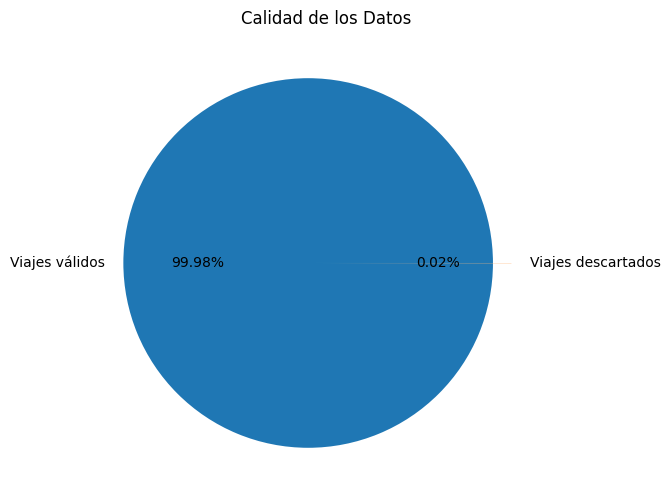

In [41]:
data = [hv_filtrado.shape[0], discarded_rows]
keys = ['Viajes válidos', 'Viajes descartados']
plt.title('Calidad de los Datos') 
plt.pie(data, labels=keys,explode=[0.1,0], autopct='%.2f%%')
plt.show()

## Se tiene que luego de los filtros realizados, se ha conservado practicamente el 100% de los datos

In [42]:
hv_time_transformed.head()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_time,PULocationID,DOLocationID,avg_speed,weekday,PU_dia,PU_mes,PU_hora,PU_dia_semana,PU_año
0,2024-09-01 00:00:42,2024-09-01 00:04:11,2024-09-01 00:04:54,2024-09-01 00:12:03,1.64,429,263,75,13.762238,Sunday,1,9,0,6,2024
1,2024-09-01 00:26:16,2024-09-01 00:27:03,2024-09-01 00:27:49,2024-09-01 00:48:40,5.66,1251,263,249,16.287770,Sunday,1,9,0,6,2024
2,2024-09-01 00:07:08,2024-09-01 00:07:22,2024-09-01 00:08:57,2024-09-01 00:18:34,1.48,577,161,170,9.233969,Sunday,1,9,0,6,2024
3,2024-09-01 00:19:33,2024-09-01 00:21:14,2024-09-01 00:21:48,2024-09-01 00:46:17,11.52,1469,233,220,28.231450,Sunday,1,9,0,6,2024
4,2024-09-01 00:45:51,2024-09-01 00:49:34,2024-09-01 00:49:34,2024-09-01 01:06:46,6.29,1032,220,3,21.941860,Sunday,1,9,0,6,2024


In [43]:
location_counts= hv_time_transformed.groupby(['PU_año', 'PU_mes','PU_dia','PU_hora','PU_dia_semana','weekday','PULocationID'])\
                                .agg(Count=('PULocationID','count'))\
                                .reset_index()

location_counts

,PU_año,PU_mes,PU_dia,PU_hora,PU_dia_semana,weekday,PULocationID,Count
0,2024,9,1,0,6,Sunday,3,48
1,2024,9,1,0,6,Sunday,4,167
2,2024,9,1,0,6,Sunday,5,5
3,2024,9,1,0,6,Sunday,6,13
4,2024,9,1,0,6,Sunday,7,366
...,...,...,...,...,...,...,...,...
181782,2024,9,30,23,0,Monday,260,74
181783,2024,9,30,23,0,Monday,261,68
181784,2024,9,30,23,0,Monday,262,40
181785,2024,9,30,23,0,Monday,263,77


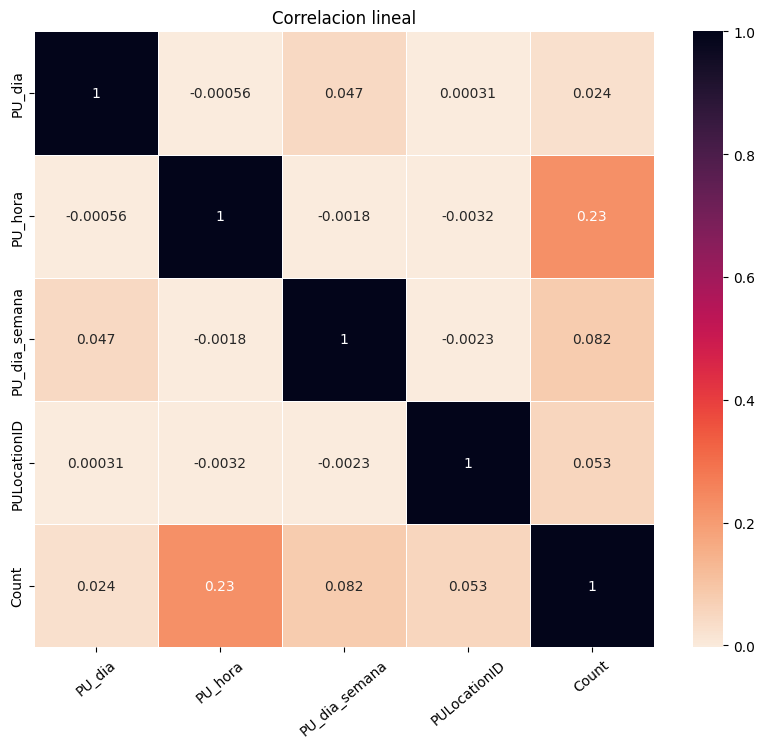

In [44]:
time_location_corr = location_counts[[ 'PU_dia', 'PU_hora', 'PU_dia_semana','PULocationID', 'Count']].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(time_location_corr, annot=True, linewidth=.5,cmap='rocket_r')
plt.title('Correlacion lineal') 
plt.xticks(rotation=40)
plt.show()

### Se observa que los atributos que mayor correlacion presenta es la hora.

### Ahora solo tomaremos en cuenta el conteo total de viajes, independiente de las ubicaciones.

In [45]:
time_counts= hv_time_transformed.groupby(['PU_año', 'PU_mes','PU_dia','PU_hora','PU_dia_semana','weekday'])\
                                .agg(Count=('PU_hora','count'))\
                                .reset_index()

time_counts

,PU_año,PU_mes,PU_dia,PU_hora,PU_dia_semana,weekday,Count
0,2024,9,1,0,6,Sunday,36929
1,2024,9,1,1,6,Sunday,29194
2,2024,9,1,2,6,Sunday,23023
3,2024,9,1,3,6,Sunday,17924
4,2024,9,1,4,6,Sunday,14883
...,...,...,...,...,...,...,...
715,2024,9,30,19,0,Monday,31243
716,2024,9,30,20,0,Monday,28199
717,2024,9,30,21,0,Monday,27580
718,2024,9,30,22,0,Monday,26403


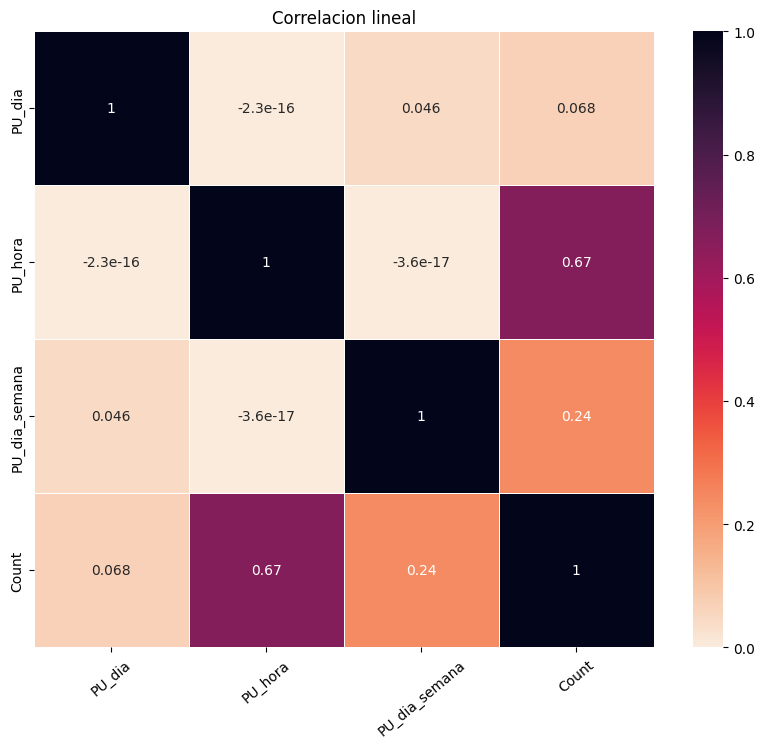

In [46]:
time_corr = time_counts[['PU_dia', 'PU_hora', 'PU_dia_semana', 'Count']].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(time_corr, annot=True, linewidth=.5, cmap='rocket_r')
plt.title('Correlacion lineal') 
plt.xticks(rotation=40)
plt.show()

## Se corrobora la influencia que tiene la hora del dia en la demanda de taxis, del mismo modo como el dia de la semana tambien tiene peso.